In [1]:
#sparting spark and reading Reddit
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Reddit").getOrCreate()
df = None
df = spark.read.csv("s3a://andrew-bierbaum-insight-test-dataset/Reddit/Reddit_Comments_2005*.csv.gz", header=True,multiLine=True, escape='"')

In [3]:
#showing the start of the data and format
df.show(5)
df.printSchema()

+--------------------+------------+--------+----------+--------------+-----------------+-----+-----------+------------+--------+----------+-----+------------+----------------+------+-------+----------+---+-------------+----------------------+--------------+
|                body|score_hidden|archived|      name|        author|author_flair_text|downs|created_utc|subreddit_id| link_id| parent_id|score|retrieved_on|controversiality|gilded|     id| subreddit|ups|distinguished|author_flair_css_class|removal_reason|
+--------------------+------------+--------+----------+--------------+-----------------+-----+-----------+------------+--------+----------+-----+------------+----------------+------+-------+----------+---+-------------+----------------------+--------------+
|How do you know w...|       false|    true|t1_c0a8131|   GeorgeWatts|             null|    0| 1244751403|        t5_6|t3_8rr0t|t1_c0a80pt|    0|  1425983671|               0|     0|c0a8131|reddit.com|  0|         null|       

In [6]:
# #Convert spark data to be readable using sql queries and query for the keyword terms
df.createOrReplaceTempView("Reddit")
xamarin_results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body RLIKE 'xamarin|Xamarin'")
flutter_results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body RLIKE 'flutter|Flutter'")
react_native_results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body RLIKE 'react native|React native'")

In [7]:
#Test output
flutter_results.show()

+-----------+--------------------+
|created_utc|                body|
+-----------+--------------------+
| 1250643132|The continuation ...|
| 1253685639|No, you make it s...|
| 1253219098|I was driving up ...|
| 1261437369|There was an Indi...|
| 1261950873|I have a contact ...|
| 1259575222|Many cat collars ...|
| 1248296315|The record head s...|
| 1259606954|its always a bask...|
| 1245787883|And you combine t...|
| 1253635002|You're thinking o...|
| 1244736750|this is totally f...|
| 1252444675|[You](http://www....|
| 1249495520|He had enough qua...|
| 1246054883|Cross posting fro...|
| 1254295997|*flutters eyes an...|
| 1256451010|since feeling is ...|
| 1262291600|Oh yeah. Flutteri...|
| 1237931216|I always get a li...|
| 1231259897|one of the things...|
| 1247733207|They'd be better ...|
+-----------+--------------------+
only showing top 20 rows



In [8]:
#collect, convert dates to datetime format for later graphing, and sort data
from datetime import datetime
python_flutter_results = flutter_results.collect()
python_flutter_results_cleaned = [(datetime.fromtimestamp(float(date)),body.encode('ascii',errors='ignore')) for date, body in python_flutter_results]
python_flutter_results_cleaned.sort()

python_xamarin_results = xamarin_results.collect()
python_xamarin_results_cleaned = [(datetime.fromtimestamp(float(date)), body.encode('ascii',errors='ignore')) for date, body in python_xamarin_results]
python_xamarin_results_cleaned.sort()

python_react_native_results = react_native_results.collect()
python_react_native_results_cleaned = [(datetime.fromtimestamp(float(date)),body.encode('ascii',errors='ignore')) for date, body in python_react_native_results]
python_react_native_results_cleaned.sort()

In [11]:
#sort, number, and then graph the data
%matplotlib inline
import numpy
import matplotlib
import matplotlib.pyplot as plt
import pandas
# import sqlite3

# conn = sqlite3.connect('Reddit.db')
# cur = conn.cursor()
# DATASET_COLUMNS = ["count","body","date"]
# cur.execute("CREATE TABLE IF NOT EXISTS reddit (date FLOAT PRIMARY KEY, body , date DATETIME);")
# cur.execute("CREATE TABLE twitter (target, ids, date, flag, user,text);")

# #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
# #https://www.kaggle.com/kazanova/sentiment140/version/2
# df = pandas.read_csv('TwitterSmall.csv', encoding='ISO-8859-1', names=DATASET_COLUMNS)

#testing to see if loading is working
#print(len(df))
#print(df.head(5))
df.to_sql('twitter', conn, if_exists='replace', index=False)
#don't rebuild the table if it already exists
cur.execute("SELECT count(*) FROM sqlite_master WHERE type ='table'")
if cur.fetchall()[0] == 0:
    cur.execute("CREATE TABLE twitter (target, ids, date, flag, user,text);")
    #read the csv  
    df = pandas.read_csv('TwitterSmall.csv', encoding='ISO-8859-1', names=DATASET_COLUMNS)
    #load into sql
    df.to_sql('twitter', conn, if_exists='replace', index=False)

#do SQL query and fetch results
cur.execute("SELECT date FROM twitter WHERE text LIKE '%c++%'")
times = cur.fetchall()
cleantime = [i[0] for i in times]

#clean data (data,) - has a useless touple & produce a count
cleantime = [i[0] for i in times]
#print(times)
count = numpy.arange(len(cleantime))

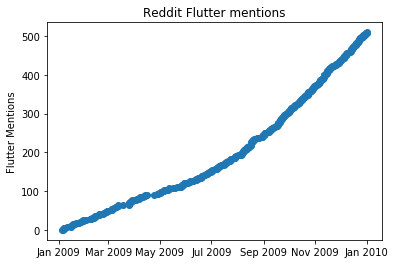

<Figure size 432x288 with 0 Axes>

In [12]:
#graphing and later csv export for flutter
count = numpy.arange(len(python_flutter_results_cleaned))
Date_Data = []
Body_Data = []
for date, body in python_flutter_results_cleaned:
    Date_Data.append(date)
    Body_Data.append(body)
matplotlib.pyplot.plot_date(Date_Data,count,xdate=True, drawstyle = 'steps-pre', linestyle = 'solid' )
matplotlib.pyplot.ylabel('Flutter Mentions')
matplotlib.pyplot.title('Reddit Flutter mentions')
plt.show()
plt.savefig('Reddit_flutter.png')

#print csv for flutter
pandas_df = pandas.DataFrame({'date':Date_Data,'body':Body_Data})
with open('Reddit_flutter.csv', 'a') as f:
    pandas_df.to_csv(f, header=False)

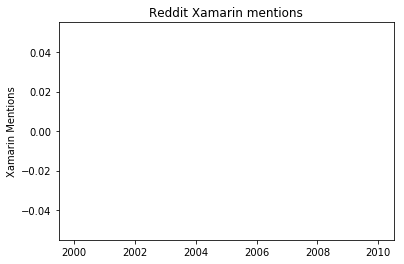

<Figure size 432x288 with 0 Axes>

In [13]:
#graphing and later csv export for xamarin
count = numpy.arange(len(python_xamarin_results_cleaned))
Date_Data = []
Body_Data = []
for date, body in python_xamarin_results_cleaned:
    Date_Data.append(date)
    Body_Data.append(body)
matplotlib.pyplot.plot_date(Date_Data,count,xdate=True, drawstyle = 'steps-pre', linestyle = 'solid' )
matplotlib.pyplot.ylabel('Xamarin Mentions')
matplotlib.pyplot.title('Reddit Xamarin mentions')
plt.show()
plt.savefig('Reddit_xamarin.png')

#print csv for xamarin
pandas_df = pandas.DataFrame({'date':Date_Data,'body':Body_Data})
with open('Reddit_xamarin.csv', 'a') as f:
    pandas_df.to_csv(f, header=False)

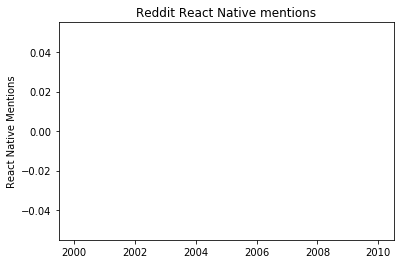

<Figure size 432x288 with 0 Axes>

In [14]:
#repeat graphing and later csv export for react native
count = numpy.arange(len(python_react_native_results_cleaned))
Date_Data = []
Body_Data = []
for date, body in python_react_native_results_cleaned:
    Date_Data.append(date)
    Body_Data.append(body)
matplotlib.pyplot.plot_date(Date_Data,count,xdate=True, drawstyle = 'steps-pre', linestyle = 'solid' )
matplotlib.pyplot.ylabel('React Native Mentions')
matplotlib.pyplot.title('Reddit React Native mentions')
plt.show()
plt.savefig('Reddit_react_native.png')

#print csv for react native
pandas_df = pandas.DataFrame({'date':Date_Data,'body':Body_Data})
with open('Reddit_react_native.csv', 'a') as f:
    pandas_df.to_csv(f, header=False)